# 生成器
#### 通过列表生成式，我们可以直接创建一个列表。但是，受到内存限制，列表容量肯定是有限的。而且，创建一个包含100万个元素的列表，不仅占用很大的存储空间，如果我们仅仅需要访问前面几个元素，那后面绝大多数元素占用的空间都白白浪费了。
#### 所以，如果列表元素可以按照某种算法推算出来，那我们是否可以在循环的过程中不断推算出后续的元素呢？这样就不必创建完整的list，从而节省大量的空间。在Python中，这种一边循环一边计算的机制，称为生成器：generator。
#### 要创建一个generator，有很多种方法。第一种方法很简单，只要把一个列表生成式的[]改成()，就创建了一个generator：


In [1]:
g = (x * x for x in range(10))
g

<generator object <genexpr> at 0x000001AD30DDECA8>

#### 建L和g的区别仅在于最外层的[]和()，L是一个list，而g是一个generator。我们可以直接打印出list的每一个元素，但我们怎么打印出generator的每一个元素呢？如果要一个一个打印出来，可以通过next()函数获得generator的下一个返回值：

In [3]:
next(g)

1

#### 我们讲过，generator保存的是算法，每次调用next(g)，就计算出g的下一个元素的值，直到计算到最后一个元素，没有更多的元素时，抛出StopIteration的错误。当然，上面这种不断调用next(g)实在是太变态了，正确的方法是使用for循环，因为generator也是可迭代对象：

In [4]:
g = (x * x for x in range(10))
for n in g:
    print(n)

0
1
4
9
16
25
36
49
64
81


#### 所以，我们创建了一个generator后，基本上永远不会调用next()，而是通过for循环来迭代它，并且不需要关心StopIteration的错误。generator非常强大。如果推算的算法比较复杂，用类似列表生成式的for循环无法实现的时候，还可以用函数来实现。
#### 比如，著名的斐波拉契数列（Fibonacci），除第一个和第二个数外，任意一个数都可由前两个数相加得到：

##### 1, 1, 2, 3, 5, 8, 13, 21, 34, ...

##### 斐波拉契数列用列表生成式写不出来，但是，用函数把它打印出来却很容易：

In [5]:
def fib(max):
    n, a, b = 0, 0, 1
    while n < max:
        print(b)
        a, b = b, a + b
        n = n + 1
    return 'done'

In [7]:
fib(5)

1
1
2
3
5


'done'

#### 注意，赋值语句：
a, b = b, a + b
#### 相当于：
##### t = (b, a + b) # t是一个tuple
##### a = t[0]
##### b = t[1]
#### 但不必显式写出临时变量t就可以赋值。上面的函数可以输出斐波那契数列的前N个数
#### 仔细观察，可以看出，fib函数实际上是定义了斐波拉契数列的推算规则，可以从第一个元素开始，推算出后续任意的元素，这种逻辑其实非常类似generator。也就是说，上面的函数和generator仅一步之遥。要把fib函数变成generator，只需要把print(b)改为yield b就可以了：

In [8]:
def fib(max):
    n, a, b = 0, 0, 1
    while n < max:
        yield b
        a, b = b, a + b
        n = n + 1
    return 'done'

In [12]:
for n in fib(6):
    print(n)

1
1
2
3
5
8


#### 但是用for循环调用generator时，发现拿不到generator的return语句的返回值。如果想要拿到返回值，必须捕获StopIteration错误，返回值包含在StopIteration的value中：

In [13]:
g = fib(6)
while True:
    try:
        x = next(g)
        print('g:', x)
    except StopIteration as e:
        print('Generator return value:', e.value)
        break

g: 1
g: 1
g: 2
g: 3
g: 5
g: 8
Generator return value: done


# 练习
#### 杨辉三角定义如下：
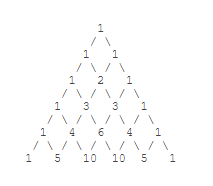
#### 把每一行看做一个list，试写一个generator，不断输出下一行的list：

In [20]:
def triangles(n):
    L=[1]
    a=1
    while a <= n:   
        yield L
        L.append(0)
        L = [L[i - 1] + L[i] for i in range(len(L))]
        a=a+1
        

In [26]:
num = input('请输入行数：')
for n in triangles(int(num)):
    print(n)



请输入行数：5
[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
